# Get qSV-regressed clean data for SCZ cases

Initial purpose is to check whether AHBA axes help parse heterogeneity

In [99]:
source("../code/preprocess.R")
select <- dplyr::select

## Understanding data...

Data received from LIBD (has clinical data)

In [290]:
load("../data/rse_gene_BrainSeq_phases_1_2.n1627.Rdata")

In [101]:
colData(rse_gene) %>% data.frame %>% group_by(Dataset,Dx) %>% 
summarise(n_samples=n()) %>% 
mutate(Dx = factor(Dx, levels=c('Control', 'SCZD', 'MDD', 'Bipolar'), ordered=T)) %>% arrange(Dataset, Dx)
# summarise(samples=n_distinct(RNum), donors = n_distinct(BrNum))

`summarise()` has grouped output by 'Dataset'. You can override using the
`.groups` argument.


Dataset,Dx,n_samples
<chr>,<ord>,<int>
BrainSeq_Phase1,Control,332
BrainSeq_Phase1,SCZD,178
BrainSeq_Phase1,MDD,150
BrainSeq_Phase1,Bipolar,67
BrainSeq_Phase2_DLPFC,Control,300
BrainSeq_Phase2_DLPFC,SCZD,152
BrainSeq_Phase2_DLPFC,MDD,1
BrainSeq_Phase2_HIPPO,Control,314
BrainSeq_Phase2_HIPPO,SCZD,132


In [102]:
library(readxl)
clinical <- read_excel("../data/Clin fields_ADS_subjects for UCAM collab_shared 2022.xlsx")

In [103]:
colData(rse_gene)$BrNum %>% unique %>% length

[1] 861

In [297]:
colData(rse_gene) %>% data.frame %>% select(BrNum, Dataset, Region, Dx) %>% 
group_by(Dx, BrNum) %>% 
summarise(
    Phase1_DLPFC=sum(Dataset=='BrainSeq_Phase1'),
    Phase2_DLPFC=sum(Dataset=='BrainSeq_Phase2_DLPFC'),
    Phase2_HIPPO=sum(Dataset=='BrainSeq_Phase2_HIPPO')
) %>% 
group_by(Phase1_DLPFC,Phase2_DLPFC) %>% 
summarize(n_donors=n()) %>% arrange(-row_number())

`summarise()` has grouped output by 'Dx'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Phase1_DLPFC'. You can override using the
`.groups` argument.


Phase1_DLPFC,Phase2_DLPFC,n_donors
<int>,<int>,<int>
1,1,355
1,0,372
0,1,98
0,0,36


In [319]:
colData(rse_gene) %>% data.frame %>% select(BrNum, Dataset, Region, Dx, Age) %>% 
filter(Region!='HIPPO', Age>=17) %>% 
group_by(Dx, BrNum) %>% 
summarise(
    Phase1_DLPFC=sum(Dataset=='BrainSeq_Phase1'),
    Phase2_DLPFC=sum(Dataset=='BrainSeq_Phase2_DLPFC'),
    Phase2_HIPPO=sum(Dataset=='BrainSeq_Phase2_HIPPO'),
    Age_17plus=max(Age>=17)
) %>% 
group_by(Age_17plus,Dx,Phase1_DLPFC,Phase2_DLPFC) %>% 
summarize(n_donors=n()) %>% 
mutate(Dx = factor(Dx, levels=c('Control', 'SCZD', 'MDD', 'Bipolar'), ordered=T)) %>% 
arrange(Dx, -row_number()) %>% 
filter(Phase1_DLPFC==1)
# filter(Dx=='MDD', n>1)
# group_by(Dataset, Region, n) %>% count()
# filter(n==3) %>% arrange(BrNum) %>% head

`summarise()` has grouped output by 'Dx'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Age_17plus', 'Dx', 'Phase1_DLPFC'. You can
override using the `.groups` argument.


Age_17plus,Dx,Phase1_DLPFC,Phase2_DLPFC,n_donors
<int>,<ord>,<int>,<int>,<int>
1,Control,1,1,165
1,Control,1,0,54
1,SCZD,1,1,123
1,SCZD,1,0,55
1,MDD,1,1,1
1,MDD,1,0,146
1,Bipolar,1,0,67


In [105]:
clinical_brains <- paste0('Br',clinical$`Br#`)
expression_brains <- colData(rse_gene)$BrNum

data.frame(brain=union(clinical_brains, expression_brains)) %>% 
mutate(clinical = brain %in% clinical_brains,
       expression = brain %in% expression_brains) %>% 
count(clinical, expression)

clinical,expression,n
<lgl>,<lgl>,<int>
FALSE,TRUE,1
TRUE,FALSE,98
TRUE,TRUE,860


In [106]:
rse_gene %>% colData %>% colnames

[1] "SAMPLE_ID"         "RNum"              "RIN"              
 [4] "Region"            "Dataset"           "BrNum"            
 [7] "Dx"                "Age"               "Sex"              
[10] "Race"              "Protocol"          "numReads"         
[13] "numMapped"         "numUnmapped"       "mitoMapped"       
[16] "totalMapped"       "overallMapRate"    "concordMapRate"   
[19] "mitoRate"          "rRNA_rate"         "totalAssignedGene"
[22] "bamFile"

Downloadable Phase1 data (has some clinical data)

In [107]:
load("../data/rse_gene_BrainSeq_Phase1_hg19_TopHat2_EnsemblV75.rda")
# tx <- load("../data/transcript_data_filtered_n495.rda")

In [108]:
colData(rse_gene) %>% data.frame %>% group_by(Dx) %>% count()

Dx,n
<chr>,<int>
Control,320
Schizo,175


In [109]:
tFpkm %>% dim

ERROR: Error in tFpkm %>% dim: object 'tFpkm' not found


Downloadable Phase2 data

In [ ]:
load("../data/rse_gene_unfiltered.Rdata")
load("../data/rse_tx_unfiltered.Rdata")

In [ ]:
colData(rse_gene) %>% data.frame %>% group_by(Region,Dx) %>% count

Region,Dx,n
<chr>,<chr>,<int>
DLPFC,Control,300
DLPFC,Schizo,153
HIPPO,Control,314
HIPPO,Schizo,133


In [ ]:
load("../data/methprop_pd.Rdata")

In [ ]:
pd %>% data.frame %>% colnames

[1] "SAMPLE_ID"              "FQCbasicStats"          "perBaseQual"           
 [4] "perTileQual"            "perSeqQual"             "perBaseContent"        
 [7] "GCcontent"              "Ncontent"               "SeqLengthDist"         
[10] "SeqDuplication"         "OverrepSeqs"            "AdapterContent"        
[13] "KmerContent"            "percentGC_R1"           "phred100_R1"           
[16] "phredGT30_R1"           "phredGT35_R1"           "Adapter88_R1"          
[19] "percentGC_R2"           "phred100_R2"            "phredGT30_R2"          
[22] "phredGT35_R2"           "Adapter88_R2"           "ERCCsumLogErr"         
[25] "bamFile"                "trimmed"                "numReads"              
[28] "numMapped"              "numUnmapped"            "overallMapRate"        
[31] "concordMapRate"         "totalMapped"            "mitoMapped"            
[34] "mitoRate"               "totalAssignedGene"      "rRNA_rate"             
[37] "RNum"                   "BrNum"                  "Region"                
[40] "RIN"                    "Age"                    "Sex"                   
[43] "Race"                   "Dx"                     "snpPC1"                
[46] "snpPC2"                 "snpPC3"                 "snpPC4"                
[49] "snpPC5"                 "snpPC6"                 "snpPC7"                
[52] "snpPC8"                 "snpPC9"                 "snpPC10"               
[55] "ageGroup"               "ageStage"               "Fetal_replicating"     
[58] "Fetal_quiescent"        "OPC"                    "Neurons"               
[61] "Astrocytes"             "Oligodendrocytes"       "Microglia"             
[64] "Endothelial"            "fetal"                  "birth"                 
[67] "infant"                 "child"                  "teen"                  
[70] "adult"                  "mean_mitoRate"          "mean_totalAssignedGene"
[73] "mean_RIN"

## Clean data and save

### Using received data

In [ ]:
load("../data/rse_gene_BrainSeq_phases_1_2.n1627.Rdata")
colData(rse_gene) %>% data.frame %>% group_by(Dataset,Dx) %>% count()

In [ ]:
rse_gene %>% colData %>% colnames

[1] "SAMPLE_ID"         "RNum"              "RIN"              
 [4] "Region"            "Dataset"           "BrNum"            
 [7] "Dx"                "Age"               "Sex"              
[10] "Race"              "Protocol"          "numReads"         
[13] "numMapped"         "numUnmapped"       "mitoMapped"       
[16] "totalMapped"       "overallMapRate"    "concordMapRate"   
[19] "mitoRate"          "rRNA_rate"         "totalAssignedGene"
[22] "bamFile"

In [ ]:
rse_gene %>% colData %>% data.frame %>% group_by(Dataset) %>% count()

Dataset,n
<chr>,<int>
BrainSeq_Phase1,727
BrainSeq_Phase2_DLPFC,453
BrainSeq_Phase2_HIPPO,447


In [ ]:
rse_gene_filter <- rse_gene %>% 
    subset(
        select = 
            # (Dx %in% c('SCZD')) & 
            (Dataset %in% c('BrainSeq_Phase2_DLPFC')) &
            (Age >= 13) & (Age <= 150)
    )

In [ ]:
library(DESeq2)
assays(rse_gene_filter)['vst'] <- varianceStabilizingTransformation(assay(rse_gene_filter))

converting counts to integer mode

Warning message in recycleSingleBracketReplacementValue(value, x, nsbs):
“number of values supplied is not a sub-multiple of the number of values to be replaced”


In [ ]:
assays(rse_gene)['vst'] %>% 
data.frame %>% rownames_to_column('ensembl_id') %>% 
write_csv('../outputs/exp_SCZ.csv')

### Using public data

In [134]:
load("../data/rse_gene_unfiltered.Rdata")
load("../data/rse_tx_unfiltered.Rdata")

In [139]:
source("../code/preprocess.r")
rse_merge_vars <- rse_gene %>% merge_covariates
rse_select_samples <- rse_merge_vars %>% select_samples(diagnosis=c('Control', 'Schizo'))
rse_clean_samples <- rse_select_samples %>% clean_outlier_samples
rse_clean_genes <- rse_clean_samples %>% clean_genes
rse_cell_proportions <- rse_clean_genes %>% get_cell_proportions
rse_norm_samples <- rse_cell_proportions %>% normalise_samples
saveRDS(rse_norm_samples, "../data/rse_norm_samples_CTLSCZ.rds")

formula <- "~ Dx + Age + Sex + Race + mitoRate + rRNA_rate + totalAssignedGene + RIN +
                         snpPC1 + snpPC2 + snpPC3 + snpPC4 + snpPC5 + 
                         snpPC6 + snpPC7 + snpPC8 + snpPC9 + snpPC10 +
                         ast + end + mic + neu + oli + opc
                         "
# formula <- "~ Dx + Age + Sex + Race + mitoRate + rRNA_rate + totalAssignedGene + RIN +
#                          ast + end + mic + neu + oli + opc
#                          "
rse_regressed <- rse_norm_samples %>% 
    regress_covariates(rse_tx, formula = formula, n_qsvs = 0, P=1)
rse_norm_genes <- rse_regressed %>% normalise_genes

saveRDS(rse_norm_genes, "../outputs/rse_processed_CTL_SCZ_noQSV.rds")

rse_clean <- readRDS("../outputs/rse_processed_CTL_SCZ_noQSV.rds")


Merged data from multi-lane samples.
Selected 341 of 900 samples.
Removed 7 outliers leaving 334 samples.
Filtered 36779 of 58037 genes.
Added cell proportion estimates from BRETIGEA.
Normalised logRPKM quantiles using preprocessCore.
Regressing covariates...
... matched gene & transcript samples
... made qSVs
... computed residuals
Regressed covariates.
Normalised genes by rank using RNOmni.


In [ ]:
# rse_QSV_SCZ <- readRDS("../outputs/rse_processed_QSV_SCZ.rds")
assays(rse_QSV)[['ranknorm']] %>% t %>% magrittr::set_rownames(rse_QSV$BrNum) %>% 
data.frame %>% rownames_to_column('BrNum') %>% write_csv('../outputs/libd.csv')
# data.frame %>% rownames_to_column('ensembl_id') %>% t

# write_csv('../outputs/exp_SCZ.csv')

In [ ]:
load("../data/methprop_pd.Rdata")
pd %>% data.frame %>% tibble %>% colname

## Scatter plots

In [431]:
rse_QSV <- readRDS("../outputs/rse_processed_CTL_SCZ_QSV.rds")
rse_noQSV <- readRDS("../outputs/rse_processed_CTL_SCZ_noQSV.rds")

In [283]:
exp <- assays(rse_clean)[['ranknorm']]

### PCA

In [262]:
pca <- exp %>% t %>% prcomp
cols <- c('RIN','Age','Sex','Race','Dx')
phenotype <- colData(rse)[, cols] %>% data.frame %>% rownames_to_column('sample')
# phenotype %>% head
df <- pca$x[,1:2] %>% data.frame %>% rownames_to_column('sample') %>% 
    left_join(phenotype, by='sample')
df %>% head

,sample,PC1,PC2,RIN,Age,Sex,Race,Dx
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,R10424,-21.995659,-26.515375,6.7,64.08,M,CAUC,Control
2,R12195,36.974949,-3.969407,8.4,62.61,M,AA,Schizo
3,R12198,27.001730,10.612705,8.5,29.98,M,CAUC,Schizo
4,R12199,4.483646,-9.387446,8.8,65.26,M,CAUC,Schizo
5,R12200,70.365410,-29.557842,7.0,32.35,M,AA,Schizo
6,R12258,33.977237,-19.475621,8.6,69.07,F,CAUC,Control


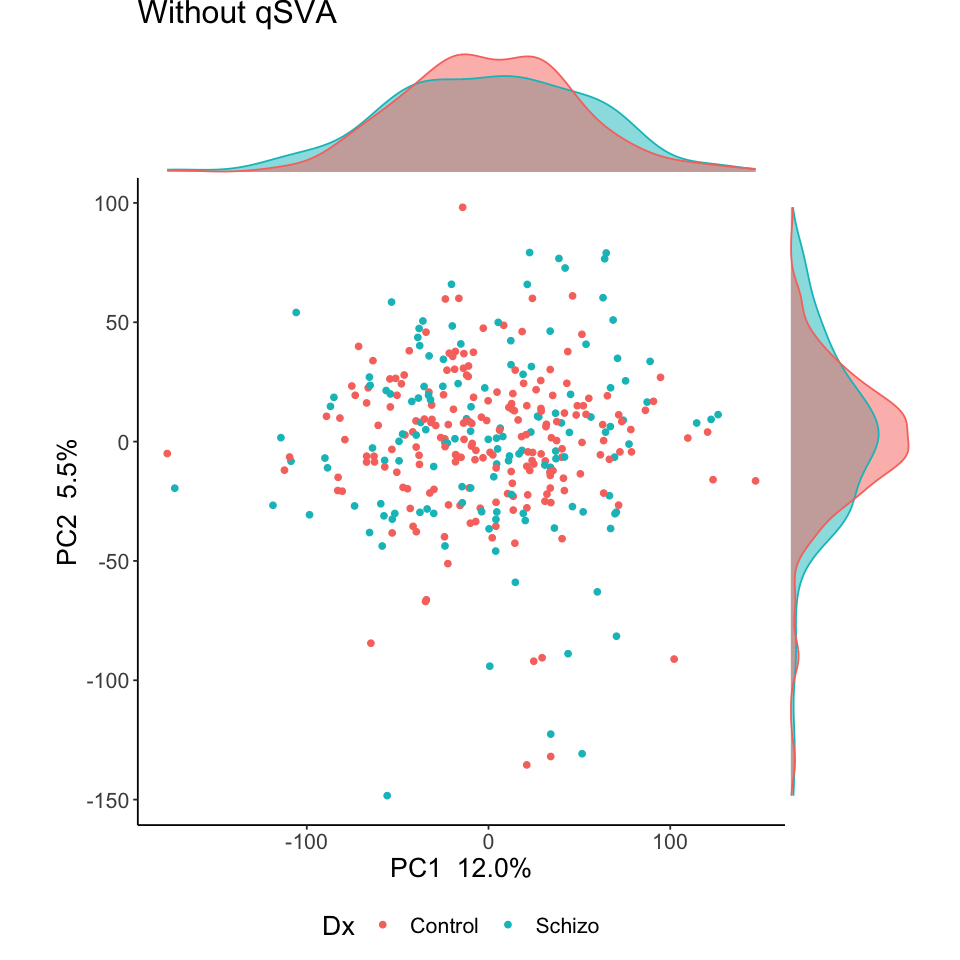

In [263]:
options(repr.plot.width=8, repr.plot.height=8)

var_exp <- pca$sdev[1:2]**2/sum(pca$sdev**2)
var_exp <- as.list(scales::percent(var_exp)) %>% `names<-`(c('x','y'))

g1 <- df %>% 
ggplot(aes(x=PC1, y=PC2)) +
geom_point(aes(color=Dx)) +
xlab(paste('PC1 ', var_exp[1])) +
ylab(paste('PC2 ', var_exp[2])) +
theme_classic() + 
theme(
    legend.position='bottom',
    aspect.ratio=1,
    text=element_text(size=16)
    ) +
ggtitle('Without qSVA')


library(ggExtra)
# ggMarginal(g1, type='density')
ggMarginal(g1, type='density', groupColour = T, groupFill = T)

### AHBA weights projection...

In [249]:
ahba_weights <- read_csv("../data/ahba_dme_hcp_top8kgenes_weights.csv") %>% rename('SYMBOL'=`...1`)

# BiocManager::install("EnsDb.Hsapiens.v79")
library(EnsDb.Hsapiens.v79)
symbol_to_ensembl <- ensembldb::select(EnsDb.Hsapiens.v79, 
    keys= ahba_weights$SYMBOL, 
    keytype = "SYMBOL", 
    columns = c("SYMBOL","GENEID")) %>% data.frame

ahba_weights <- ahba_weights %>% left_join(symbol_to_ensembl, on='SYMBOL')
ahba_weights %>% head

New names:
• `` -> `...1`
Rows: 7973 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ...1
dbl (3): G1, G2, G3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining, by = "SYMBOL"


SYMBOL,G1,G2,G3,GENEID
<chr>,<dbl>,<dbl>,<dbl>,<chr>
A1BG,-0.01545097,-0.0049344128,0.0007006888,ENSG00000121410
A1BG-AS1,-0.01198168,-0.0012166034,-0.0161851621,ENSG00000268895
AAAS,0.01160983,0.0049231453,0.0027494930,ENSG00000094914
AAED1,-0.01383918,-0.0003782503,0.0083217647,ENSG00000158122
AAGAB,-0.00509711,0.0198808448,-0.0147565606,ENSG00000103591
AAK1,0.01331212,0.0012747156,-0.0026440009,ENSG00000115977


In [284]:
# Remove gene id version
exp_names <- rownames(exp) %>% str_replace('\\..*','')
# Find matching genes
matched_genes <- intersect(exp_names, ahba_weights$GENEID)
# Filter for matched genes
weights_matched <- ahba_weights %>% dplyr::filter(GENEID %in% matched_genes)
exp_matched <- exp %>% `rownames<-`(exp_names) %>% .[matched_genes, ]
weights_matched <- weights_matched %>% column_to_rownames('GENEID') %>% 
    dplyr::select(-SYMBOL) %>% .[matched_genes,] %>% as.matrix

In [285]:
exp_projected <- t(exp_matched) %*% weights_matched
phenotype <- colData(rse)[, cols] %>% data.frame %>% rownames_to_column('sample')
df <- exp_projected %>% data.frame %>% rownames_to_column('sample') %>% 
    left_join(phenotype, by='sample')
df %>% head

,sample,G1,G2,G3,RIN,Age,Sex,Race,Dx
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,R10424,-13.682949,2.687333,7.394349,6.7,64.08,M,CAUC,Control
2,R12195,1.257108,12.338546,1.638935,8.4,62.61,M,AA,Schizo
3,R12198,-2.941115,12.293801,6.980885,8.5,29.98,M,CAUC,Schizo
4,R12199,12.249454,19.596299,11.889413,8.8,65.26,M,CAUC,Schizo
5,R12200,-4.531592,-4.036780,3.764451,7.0,32.35,M,AA,Schizo
6,R12258,8.653820,10.343785,0.383670,8.6,69.07,F,CAUC,Control


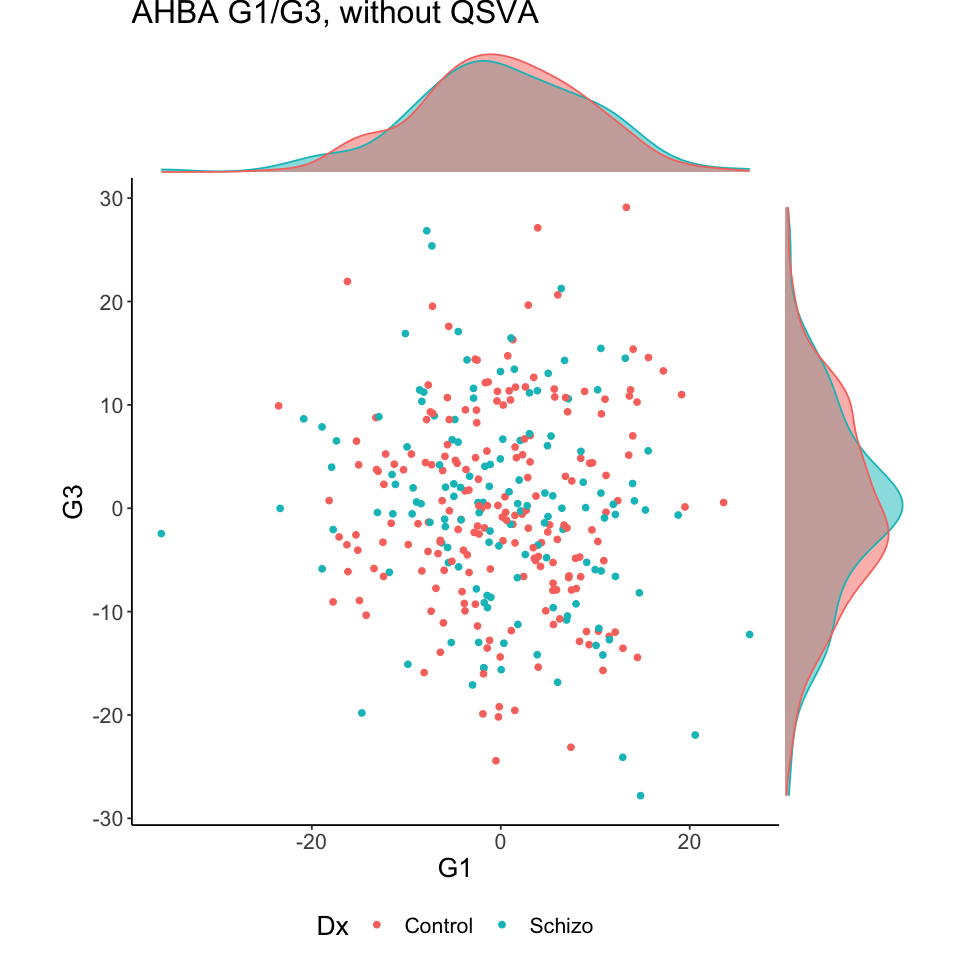

In [252]:
options(repr.plot.width=8, repr.plot.height=8)
g1 <- df %>% 
ggplot(aes(x=G1, y=G3)) +
geom_point(aes(color=Dx)) +
theme_classic() + 
theme(
    legend.position='bottom',
    aspect.ratio=1,
    text=element_text(size=16)
    ) +
ggtitle('AHBA G1/G3, without QSVA')


library(ggExtra)
# ggMarginal(g1, type='density')
ggMarginal(g1, type='density', groupColour = T, groupFill = T)

In [281]:
# No QSVA
glm(factor(Dx)~G1+G2+G3 + Age + Sex + Race + RIN, data=df, family='binomial') %>% summary


Call:
glm(formula = factor(Dx) ~ G1 + G2 + G3 + Age + Sex + Race + 
    RIN, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4335  -1.0252  -0.8607   1.2838   1.7172  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.0786260  1.3308807  -1.562   0.1183   
G1          -0.0008645  0.0127279  -0.068   0.9458   
G2           0.0028690  0.0166187   0.173   0.8629   
G3          -0.0032479  0.0128506  -0.253   0.8005   
Age          0.0203945  0.0077612   2.628   0.0086 **
SexM        -0.0734743  0.2549171  -0.288   0.7732   
RaceCAUC     0.3279456  0.2298057   1.427   0.1536   
RIN          0.0815566  0.1525401   0.535   0.5929   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 451.45  on 333  degrees of freedom
Residual deviance: 442.14  on 326  degrees of freedom
AIC: 458.14

Number of Fisher Scoring ite

In [288]:
# QSVA
glm(factor(Dx)~G1+G2+G3 + Age + Sex + Race + RIN, data=df, family='binomial') %>% summary


Call:
glm(formula = factor(Dx) ~ G1 + G2 + G3 + Age + Sex + Race + 
    RIN, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4391  -1.0256  -0.8673   1.2821   1.7089  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.078061   1.330994  -1.561  0.11846   
G1          -0.000527   0.012130  -0.043  0.96535   
G2           0.001757   0.016362   0.107  0.91447   
G3          -0.002578   0.015564  -0.166  0.86846   
Age          0.020391   0.007759   2.628  0.00858 **
SexM        -0.074113   0.254872  -0.291  0.77121   
RaceCAUC     0.328067   0.229771   1.428  0.15335   
RIN          0.081562   0.152541   0.535  0.59287   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 451.45  on 333  degrees of freedom
Residual deviance: 442.19  on 326  degrees of freedom
AIC: 458.19

Number of Fisher Scoring iterations: 

### PCs of DEGs?

In [335]:
library(SummarizedExperiment)
library(limma)
library(edgeR)

In [324]:
# readRDS(rse_norm_samples, "../data/rse_norm_samples_CTLSCZ.rds")
rse_clean <- rse_norm_samples

In [373]:
formula <- as.formula("~Dx + Age + Sex + mitoRate + rRNA_rate + totalAssignedGene + RIN + 
                    snpPC1 + snpPC2 +snpPC3 + snpPC4 + snpPC5")
mod <- model.matrix(formula, data = colData(rse_clean))
rse_tx_matched <- match_rse_tx_samples(rse_tx, rse_clean)
qsvs <- make_qsvs(rse_tx_matched, formula=formula)
modQsva = cbind(mod, qsvs)

In [374]:
modQsva = cbind(mod, qsvs[,1:10])
# dge = DGEList(counts = assays(rse_clean)$counts,
# 	genes = rowData(rse_clean))
# #calculate library-size adjustment
# dge = calcNormFactors(dge)
vGene = voom(dge,modQsva, plot=FALSE)
fitGene = lmFit(vGene)
eBGene = eBayes(fitGene)
sigGene = topTable(eBGene,coef=2,
	p.value = 1,number=nrow(rse_clean))
outGene = sigGene[rownames(rse_clean),]

sigGene[sigGene$adj.P.Val < 0.05,] %>% dim

[1] 139  17

In [396]:
rse_clean <- readRDS("../outputs/rse_processed_CTL_SCZ_QSV.rds")
sigGeneID = rownames(sigGene[sigGene$adj.P.Val < 0.05,])
rse_sig = rse_clean[rownames(rse_clean) %in% sigGeneID,]
exp_sig = assays(rse_sig)[['ranknorm']] %>% t
pca_sig = prcomp(exp_sig)

In [397]:
cols <- c('RIN','Age','Sex','Race','Dx')
phenotype <- colData(rse_clean)[, cols] %>% data.frame %>% rownames_to_column('sample')
df <- pca_sig$x[,1:2] %>% data.frame %>% rownames_to_column('sample') %>% 
    left_join(phenotype, by='sample')
df %>% head

,sample,PC1,PC2,RIN,Age,Sex,Race,Dx
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,R10424,1.232689,6.2427230,6.7,64.08,M,CAUC,Control
2,R12195,-6.725942,-4.5552645,8.4,62.61,M,AA,Schizo
3,R12198,-1.511985,2.2233907,8.5,29.98,M,CAUC,Schizo
4,R12199,-1.662856,-6.2627175,8.8,65.26,M,CAUC,Schizo
5,R12200,-3.828228,4.5584865,7.0,32.35,M,AA,Schizo
6,R12258,3.917882,-0.3288401,8.6,69.07,F,CAUC,Control


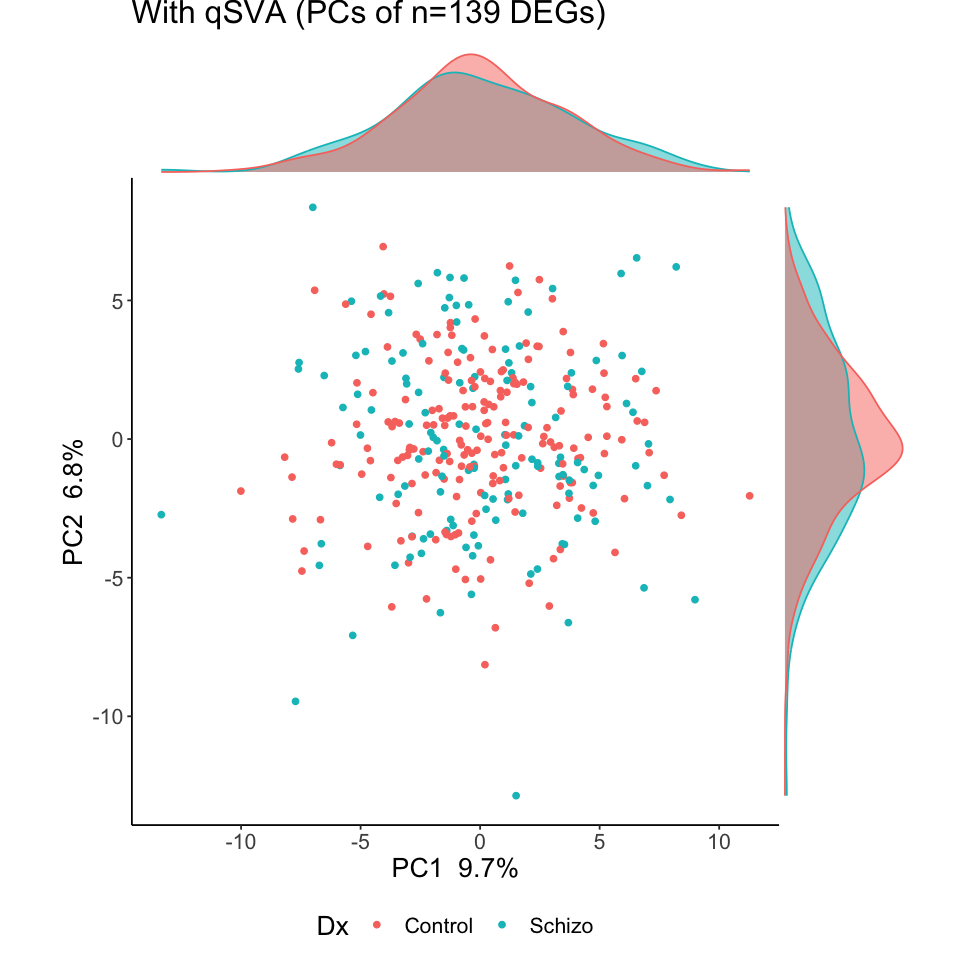

In [398]:
options(repr.plot.width=8, repr.plot.height=8)

var_exp <- pca_sig$sdev[1:2]**2/sum(pca_sig$sdev**2)
var_exp <- as.list(scales::percent(var_exp)) %>% `names<-`(c('x','y'))

g1 <- df %>% 
ggplot(aes(x=PC1, y=PC2)) +
geom_point(aes(color=Dx)) +
xlab(paste('PC1 ', var_exp[1])) +
ylab(paste('PC2 ', var_exp[2])) +
theme_classic() + 
theme(
    legend.position='bottom',
    aspect.ratio=1,
    text=element_text(size=16)
    ) +
ggtitle('With qSVA (PCs of n=139 DEGs)')


library(ggExtra)
# ggMarginal(g1, type='density')
ggMarginal(g1, type='density', groupColour = T, groupFill = T)

In [389]:
vGene0 = voom(dge, mod, plot=F)
fitGene0 = lmFit(vGene0)
eBGene0 = eBayes(fitGene0)
sigGene0 = topTable(eBGene0,coef=2,
	p.value = 1,number=nrow(rse_clean))
outGene0 = sigGene0[rownames(rse_clean),]

sigGene0[sigGene0$adj.P.Val<0.05,] %>% dim

[1] 1117   17

In [392]:
# rse_clean <- readRDS("../outputs/rse_processed_CTL_SCZ_noQSV.rds")
sigGeneID = rownames(sigGene0[sigGene0$adj.P.Val < 0.05,])
rse_sig = rse_clean[rownames(rse_clean) %in% sigGeneID,]
exp_sig = assays(rse_sig)[['ranknorm']] %>% t
pca_sig = prcomp(exp_sig)

In [393]:
cols <- c('RIN','Age','Sex','Race','Dx')
phenotype <- colData(rse_clean)[, cols] %>% data.frame %>% rownames_to_column('sample')
df <- pca_sig$x[,1:2] %>% data.frame %>% rownames_to_column('sample') %>% 
    left_join(phenotype, by='sample')
df %>% head

,sample,PC1,PC2,RIN,Age,Sex,Race,Dx
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,R10424,-8.751782,-0.3374146,6.7,64.08,M,CAUC,Control
2,R12195,11.794085,-0.8111310,8.4,62.61,M,AA,Schizo
3,R12198,4.405370,4.9927664,8.5,29.98,M,CAUC,Schizo
4,R12199,3.613740,-0.7587583,8.8,65.26,M,CAUC,Schizo
5,R12200,9.641783,7.5191211,7.0,32.35,M,AA,Schizo
6,R12258,11.112506,-3.5524220,8.6,69.07,F,CAUC,Control


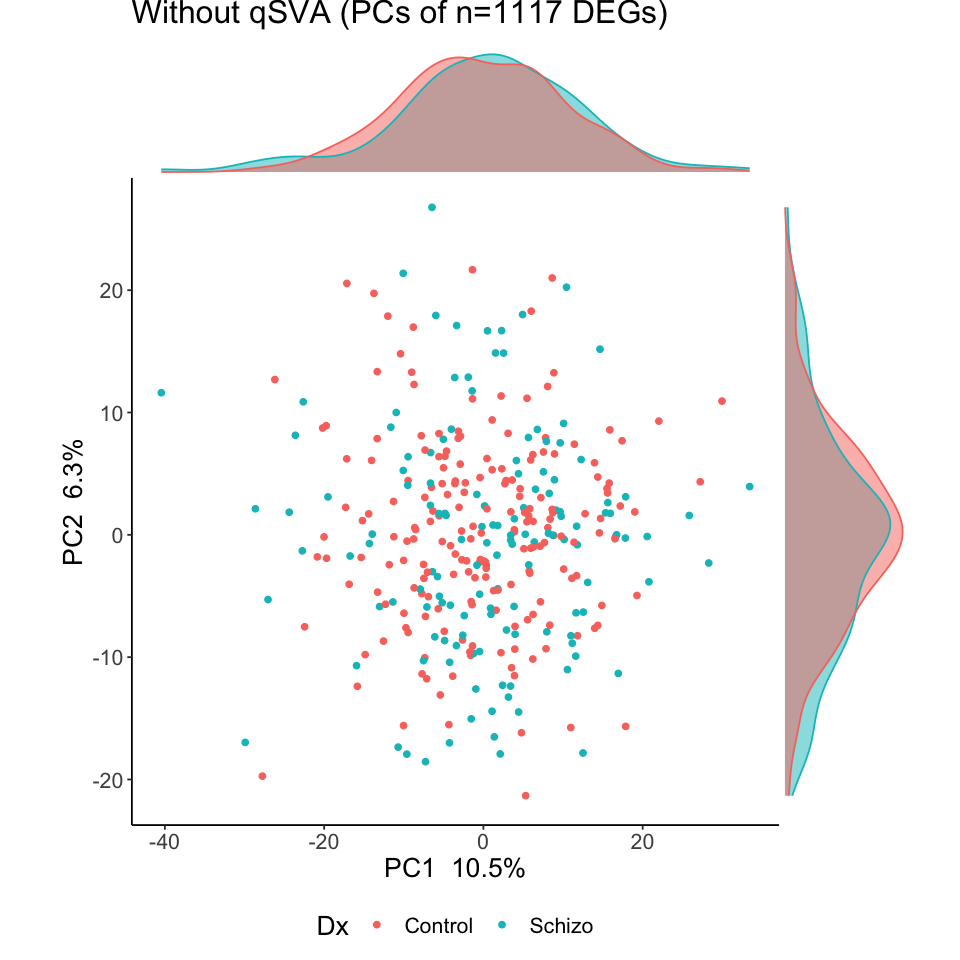

In [394]:
options(repr.plot.width=8, repr.plot.height=8)

var_exp <- pca_sig$sdev[1:2]**2/sum(pca_sig$sdev**2)
var_exp <- as.list(scales::percent(var_exp)) %>% `names<-`(c('x','y'))

g1 <- df %>% 
ggplot(aes(x=PC1, y=PC2)) +
geom_point(aes(color=Dx)) +
xlab(paste('PC1 ', var_exp[1])) +
ylab(paste('PC2 ', var_exp[2])) +
theme_classic() + 
theme(
    legend.position='bottom',
    aspect.ratio=1,
    text=element_text(size=16)
    ) +
ggtitle('Without qSVA (PCs of n=1117 DEGs)')


library(ggExtra)
# ggMarginal(g1, type='density')
ggMarginal(g1, type='density', groupColour = T, groupFill = T)

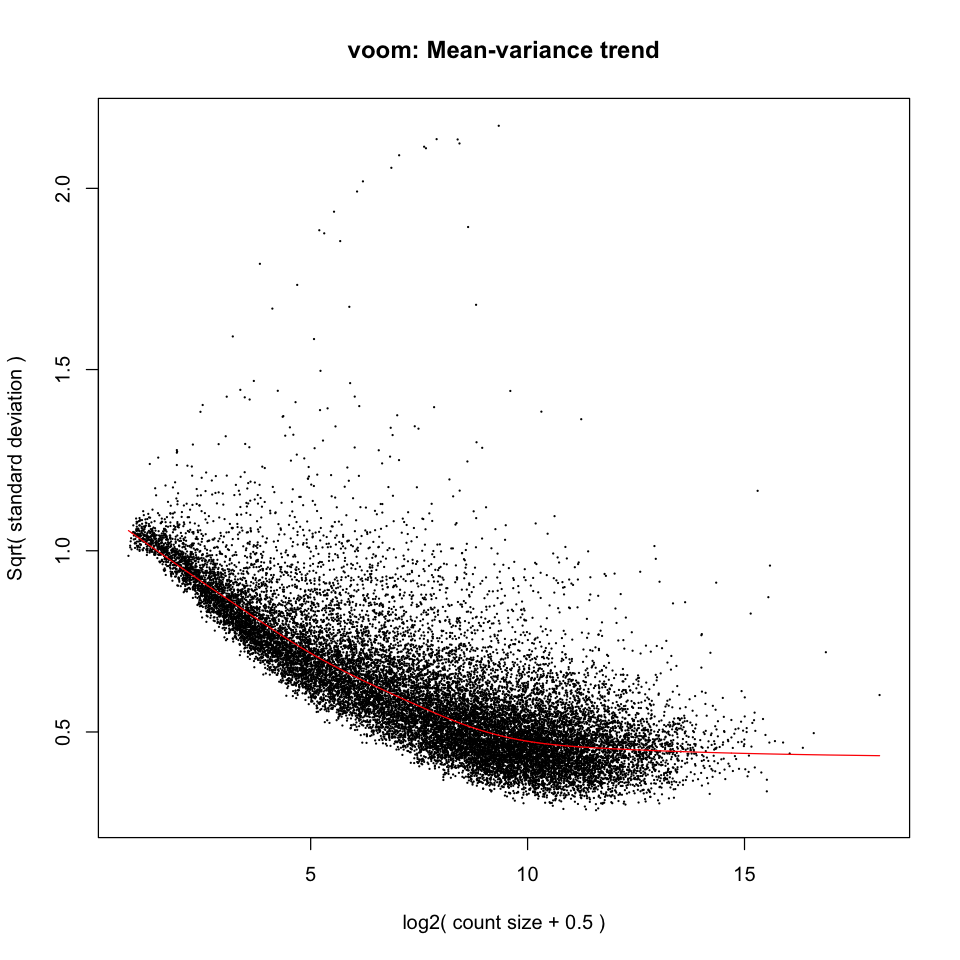

In [347]:
vGeneNoAdj = voom(dge, with(colData(rse_clean), model.matrix( ~ Dx)), plot=F)
fitGeneNoAdj = lmFit(vGeneNoAdj)
eBGeneNoAdj = eBayes(fitGeneNoAdj)
sigGeneNoAdj = topTable(eBGeneNoAdj,coef=2,
	p.value = 1,number=nrow(rse_clean))
outGeneNoAdj = sigGeneNoAdj[rownames(rse_clean),]

In [350]:
sigGeneNoAdj[sigGeneNoAdj$adj.P.Val<0.05,] %>% dim

[1] 5753   17

## PLS??

In [408]:
# install.packages("pls")
# library(pls)
BiocManager::install("mixOmics")
library(mixOmics)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Installing package(s) 'mixOmics'

also installing the dependencies 'RSpectra', 'ellipse', 'corpcor', 'rARPACK'





The downloaded binary packages are in
	/var/folders/73/3b3155ss68b0h1p_qfqr8g8h0000gn/T//Rtmpjihh9r/downloaded_packages


Old packages: 'BH', 'BSgenome', 'Biobase', 'BiocFileCache', 'BiocManager',
  'BiocParallel', 'DESeq2', 'DT', 'DelayedArray', 'Formula', 'GenomeInfoDb',
  'GenomicFeatures', 'GenomicRanges', 'Hmisc', 'IRanges', 'IRkernel', 'MASS',
  'Matrix', 'NetRep', 'RCurl', 'RSQLite', 'Rcpp', 'RcppArmadillo', 'RcppEigen',
  'RhpcBLASctl', 'S4Vectors', 'VariantAnnotation', 'WGCNA', 'XML', 'XVector',
  'bit', 'boot', 'broom', 'bslib', 'cachem', 'class', 'cli', 'clue',
  'codetools', 'collections', 'colorspace', 'curl', 'data.table', 'dbplyr',
  'digest', 'doRNG', 'dplyr', 'dtplyr', 'edgeR', 'evaluate', 'fansi',
  'fastmap', 'fontawesome', 'forcats', 'foreign', 'formatR', 'fs', 'gargle',
  'genefilter', 'gert', 'ggnetwork', 'ggplot2', 'ggpubr', 'ggrepel', 'gh',
  'gtable', 'haven', 'highr', 'htmltools', 'htmlwidgets', 'httpgd', 'httpuv',
  'httr', 'igraph', 'impute', 'isoband', 'jpeg', 'jsonlite', 'knitr',
  'languageserver', 'limma', 'locfit', 'lubridate', 'mapproj', 'mgcv',
  'modelr', 'network', 'nl

In [437]:
X = assays(rse_noQSV)[['ranknorm']] %>% t
Y = ifelse(colData(rse_noQSV)[['Dx']]=='Control',0,1)
pls_out <- pls(X,Y,ncomp=2)

In [441]:
pls_x <- X %*% pls_out$loadings$X
cols <- c('RIN','Age','Sex','Race','Dx')
phenotype <- colData(rse_noQSV)[, cols] %>% data.frame %>% rownames_to_column('sample')
# phenotype %>% head
df <- pls_x %>% data.frame %>% rownames_to_column('sample') %>% 
    left_join(phenotype, by='sample')
df %>% head

,sample,comp1,comp2,RIN,Age,Sex,Race,Dx
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,R10424,-12.4818184,23.283626,6.7,64.08,M,CAUC,Control
2,R12195,5.0828379,8.662313,8.4,62.61,M,AA,Schizo
3,R12198,6.4465009,1.450926,8.5,29.98,M,CAUC,Schizo
4,R12199,0.1874764,-1.381527,8.8,65.26,M,CAUC,Schizo
5,R12200,13.6564308,31.236415,7.0,32.35,M,AA,Schizo
6,R12258,-2.5090302,17.605177,8.6,69.07,F,CAUC,Control


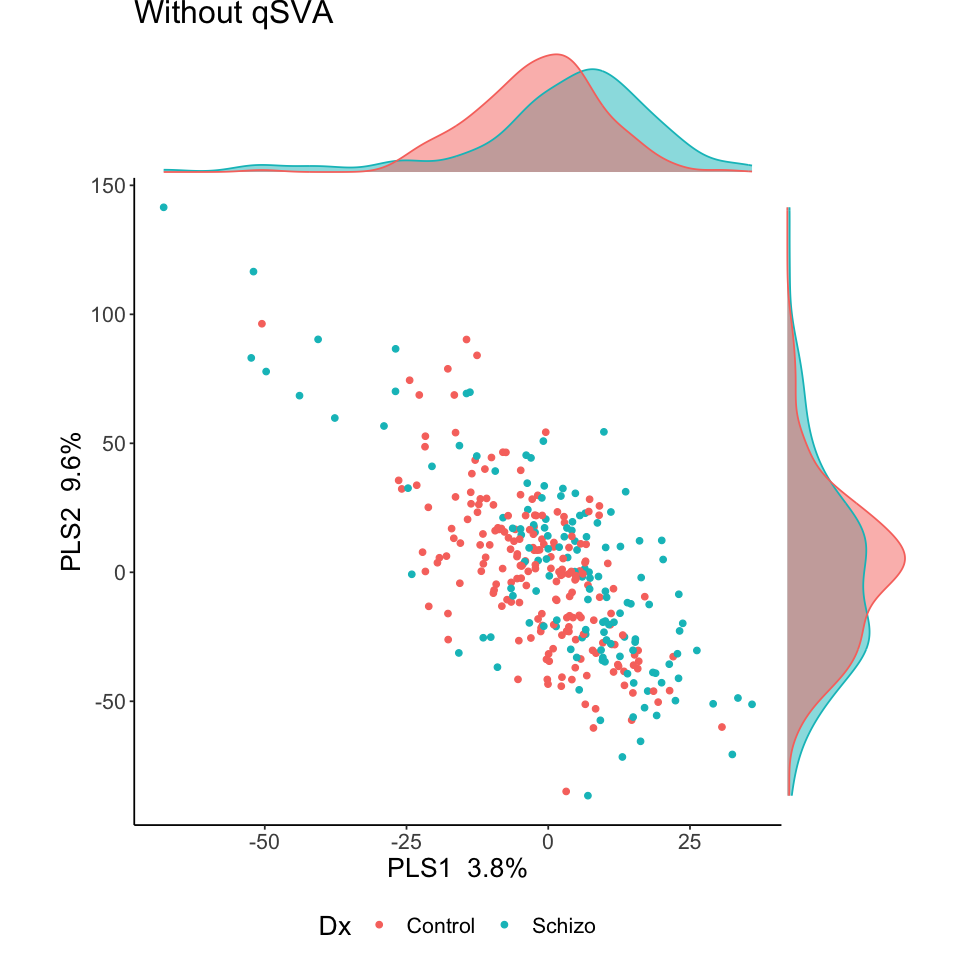

In [442]:
options(repr.plot.width=8, repr.plot.height=8)

var_exp <- pls_out$prop_expl_var$X
var_exp <- as.list(scales::percent(var_exp)) %>% `names<-`(c('x','y'))

g1 <- df %>% 
ggplot(aes(x=comp1, y=comp2)) +
geom_point(aes(color=Dx)) +
xlab(paste('PLS1 ', var_exp[1])) +
ylab(paste('PLS2 ', var_exp[2])) +
theme_classic() + 
theme(
    legend.position='bottom',
    aspect.ratio=1,
    text=element_text(size=16)
    ) +
ggtitle('Without qSVA')


library(ggExtra)
# ggMarginal(g1, type='density')
ggMarginal(g1, type='density', groupColour = T, groupFill = T)

In [465]:
pls_out$loadings$X %>% data.frame %>% 
mutate_all(.funs=function(x) {x/sd(x)}) %>% 
rownames_to_column('id') %>% 
mutate(id=str_replace(id,'\\..*','')) %>% 
write_csv("../outputs/pls_loadings.csv")

In [445]:
rse_QSV$Dx %>% table

.
Control  Schizo 
    198     136 

## WGCNA

In [ ]:
rse_QSV <- readRDS("../outputs/rse_processed_QSV.rds")
rse_noQSV <- readRDS("../outputs/rse_processed_noQSV.rds")

In [ ]:
source("../code/wgcna.r")
# sft <- get_soft_threshold(rse_noQSV)
# power <- sft$powerEstimate

net_QSV <- fit_WGCNA(rse_QSV, power=3, threads = 9,
                loadTOM = TRUE, fileBase = "QSV")

net_noQSV <- fit_WGCNA(rse_noQSV, power=4, threads = 9,
                loadTOM = TRUE, fileBase = "noQSV")